In [ ]:
'''
Anterioemente usamos bifurcaciones para crear un modelo que permita clasificar nueva información basado en la información recogida.
Ahora buscarmos una manera eficiente de modelar la información clasificada especialmente cuando tenemos una basta cantidad de factores implicados.
La primera observación que hacemos cuando graficamos la información es su confinamiento en ciertas regiones según la categoría o clasificación
Estas regiones de confinamiento estan delimtadas por curvas, superficies o hipersuperfcies que llamaremos en general membranas.
El objetivo será encontrar estas membranas que son descritas parámetricamente por los vectores ortogonales a la superficie.
Estas membranas tienen un carácter repulsivo ya que la información se confina alejándose de éstas.
El tecnicismo albionés correspondiente es SVM traducido literalmente "máquinas en soportes vectoriales" donde los soportes vectoriales son los vectores normales a las membranas.
'''

In [27]:
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

In [9]:
# Proponemos el siguiente problemas de las propiedades ópticas de un supuesto hongo metalorgánico extrasolar
# La primera medida indica el peso de carbono
# La segunda medida indica el peso de niobio
entrada = [[20.32, 99.62], [8.08, 98.8], [7.31, 20.43], [48.07, 22.16], [86.25, 70.3], [82.49, 24.66], [21.14, 75.37], [11.49, 12.16], [64.85, 91.55], [9.64, 10.25], [16.7, 3.91], [8.27, 67.95], [48.58, 85.29], [36.83, 38.89], [11.52, 82.65], [57.07, 70.77], [7.43, 79.03], [86.15, 35.4], [25.63, 20.05], [59.89, 43.65], [38.78, 46.93], [24.03, 23.94], [78.55, 0.32], [77.44, 20.28], [29.65, 72.96], [95.66, 8.4], [66.81, 98.33], [91.39, 58.19], [10.82, 7.8], [72.69, 48.83], [94.68, 15.56], [48.61, 83.57], [40.84, 72.45], [78.34, 50.79], [50.54, 29.98], [92.27, 89.88], [34.66, 71.87], [69.58, 1.41], [40.76, 1.44], [9.6, 81.01], [25.56, 28.24], [36.91, 39.34], [41.33, 24.22], [39.71, 92.95], [86.6, 31.98], [13.54, 70.52], [33.66, 55.62], [40.23, 74.25], [37.19, 63.54], [62.82, 61.37], [76.85, 91.16], [32.19, 60.26], [72.68, 90.75], [6.13, 40.82], [52.06, 96.1], [65.72, 51.72], [91.72, 56.65], [48.75, 87.99], [62.05, 7.79], [39.05, 65.05], [43.44, 32.94], [66.08, 67.35], [68.16, 17.84], [29.07, 61.96], [56.5, 46.26], [45.38, 30.71], [76.31, 67.89], [62.83, 12.85], [25.07, 73.09], [87.36, 69.12], [52.22, 5.42], [25.07, 46.55], [30.56, 66.28], [72.65, 26.84], [56.02, 62.2], [26.44, 29.36], [92.23, 66.26], [54.19, 67.88], [74.77, 14.44], [36.42, 53.88]]

In [8]:
# En el supuesto problema se destacaron tres propiedades que daremos un valor cardinal
# Translucencia identificado con el valor 0 (verde en el gráfico)
# Opacidad identificado con el valor 1 (negro en el gráfico)
# Iridiscencia identificado con el valor 2 (amarillo en el gráfico)
salida = [2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2]

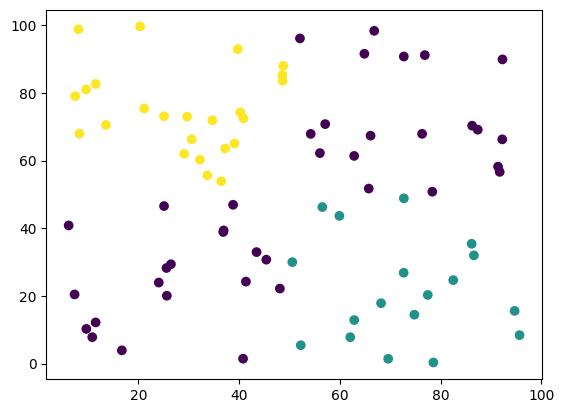

In [12]:
entrada = np.array(entrada)
e1 = entrada.transpose()[0]
e2 = entrada.transpose()[1]
plt.scatter(e1, e2, c=salida)
plt.show()

In [13]:
# Inciamos la rutina de ajuste por membranas
clf = svm.SVC()

In [14]:
# Ahora introducimos las muestras
clf.fit(entrada, salida)

SVC()

In [15]:
# Veámos que propiedad se encontaría para estos pesos de carbono y niobio
clf.predict([[56., 28.]])

array([1])

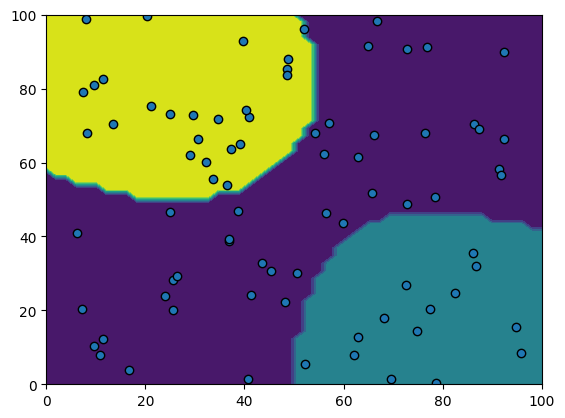

In [33]:
# Una representación gráfica de estas membranas mediadoras
peso = np.linspace(0, 100)
carbono, niobio = np.meshgrid(peso, peso)
grid = np.vstack([carbono.ravel(), niobio.ravel()]).T
propiedad_pred = np.reshape(clf.predict(grid), x.shape)
display = DecisionBoundaryDisplay(xx0=carbono, xx1=niobio, response=propiedad_pred)
display.plot()
display.ax_.scatter(e1, e2, edgecolor="black")
plt.show()